# Data Mining Analysis V2
## Assignment 1: Data Preprocessing
### Łukasz Borak, Jakub Jagła, Krzysztof Bryszak, Maksymilian Żmuda-Trzebiatowski
---
We decided to work on the Titanic dataset. It can be found on kaggle: https://www.kaggle.com/competitions/titanic/data
For the code to work, the data should be saved inside a 'data' folder.

# Load the data

In [1]:
import pandas as pd

In [3]:
train = pd.read_csv('../data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('../data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory data analysis

## Overview

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Missing values

In [9]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 891 records in total and we have 687 missing 'Cabin' values, 177 missing 'Age' records and 2 missing 'Embarked' records. We can fill the 'Embarked' with the mode of the 'Embarked' column and it's gonna be fine but other columns require a bit more thought.

### Age

<AxesSubplot: >

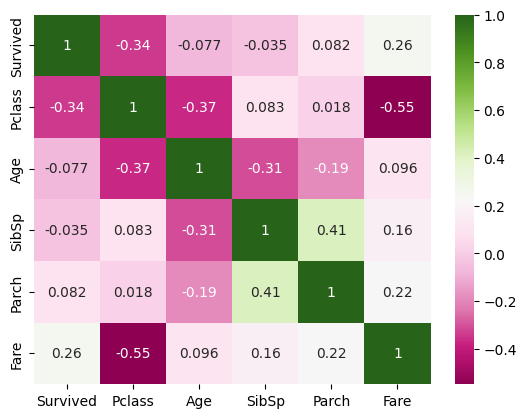

In [11]:
import seaborn as sns

train_dropped = train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) # drop ID and non-numerical columns

sns.heatmap(train_dropped.corr(), annot=True, cmap='PiYG')

NOTE: Fairly high correlation between:
 - 'Pclass' and 'Survived'
 - 'Pclass' and 'Age'
 - 'Pclass' and 'Fare'
 - 'Parch', 'SibSp' and 'Age'.

From the heatmap we can see that 'Pclass' has a fairly high negative correlation with 'Survived', indicating that passengers in lower classes were less likely to survive. 'Pclass' also has a negative correlation with 'Age' and 'Fare', suggesting that passengers in lower classes tended to be younger and paid less for their tickets. 

**Therefore we can see that 'Pclass' attribute will be crucial in approximating the missing age of the passengers.**

In [12]:
temp = train.copy()

temp.groupby(['Sex', 'Pclass'])
temp['Age'] = temp['Age'].transform(lambda x: x.fillna(x.median()))

### Cabin

<AxesSubplot: >

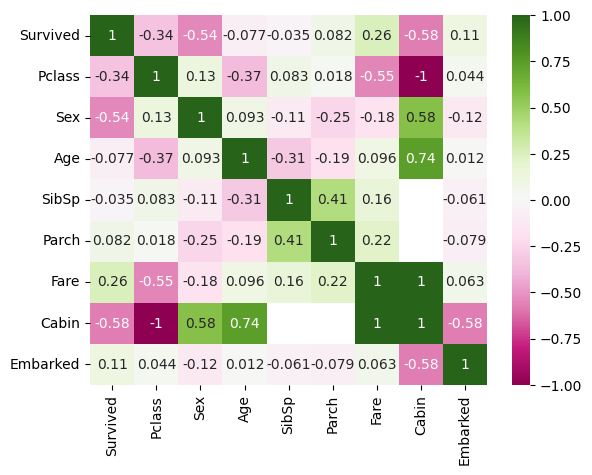

In [13]:
temp = train.copy()
temp = temp.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
temp['Sex'] = temp['Sex'].map({'male': 1, 'female': 0}) # One-hot encode sex
temp['Cabin'] = temp['Cabin'].map({'U': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 7}) # Encode cabin letters as numbers
temp['Embarked'] = temp['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) # Encode letters as numbers

sns.heatmap(temp.corr(), annot=True, cmap='PiYG')

NOTE: 'Cabin' is VERY highly correlated to 'Pclass' - we should investigate that.

In [14]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
cabins1 = train['Cabin'].where(train['Pclass'] == 1).dropna()
cabins2 = train['Cabin'].where(train['Pclass'] == 2).dropna()
cabins3 = train['Cabin'].where(train['Pclass'] == 3).dropna()
print(f'Cabins and 1st P-class - length: {len(cabins1)}\n{cabins1.describe()}')
print(f'Cabins and 2nd P-class - length: {len(cabins2)}\n{cabins2.describe()}')
print(f'Cabins and 3rd P-class - length: {len(cabins3)}\n{cabins3.describe()}')

Cabins and 1st P-class - length: 176
count         176
unique        133
top       B96 B98
freq            4
Name: Cabin, dtype: object
Cabins and 2nd P-class - length: 16
count      16
unique      7
top       F33
freq        3
Name: Cabin, dtype: object
Cabins and 3rd P-class - length: 12
count     12
unique     7
top       G6
freq       4
Name: Cabin, dtype: object


We can see that almost all 1st class passengers have their cabin records filled in. 2nd and 3rd class passengers have mostly empty Cabin attributes. We will impute the value 'Unknown' for those missing Cabin records.

In [16]:
# Extract decks from Cabin attribute
temp = train.copy()
temp['Cabin'] = temp['Cabin'].fillna('Unknown') # Fill missing cabin values with 'Unknown'
temp['Cabin'] = temp['Cabin'].apply(lambda x: x[0])
temp.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Only 1 person in Deck T and 4 people in deck G. Let's explore the survival rate for every deck.

<AxesSubplot: xlabel='Cabin', ylabel='Count'>

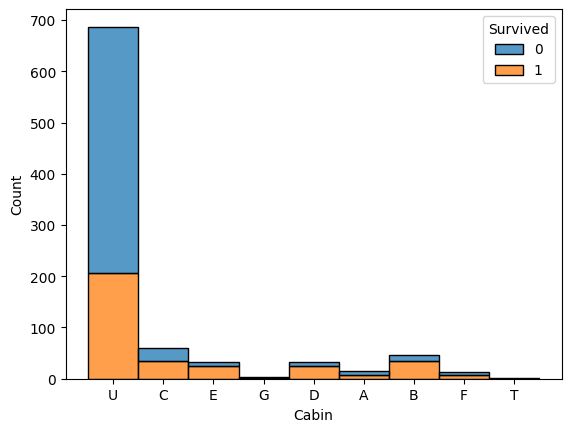

In [17]:
sns.histplot(data=temp, x='Cabin', hue='Survived', multiple='stack')

In [18]:
temp['Cabin'] = temp['Cabin'].replace(['A', 'B', 'C', 'T'], 'ABC')
temp['Cabin'] = temp['Cabin'].replace(['D', 'E'], 'DE')
temp['Cabin'] = temp['Cabin'].replace(['F', 'G'], 'FG')

temp.Cabin.value_counts()

U      687
ABC    122
DE      65
FG      17
Name: Cabin, dtype: int64

## Augmenting the dataset

In [19]:
def preprocessing1(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset.copy()
    
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}) # One-hot encode sex
    
    dataset.groupby(['Sex', 'Pclass'])
    dataset['Age'] = dataset['Age'].transform(lambda x: x.fillna(x.median())) 

    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median()) # Impute missing fare with median

    dataset['Cabin'] = dataset['Cabin'].fillna('Unknown') # Fill missing cabin values with 'Unknown'    
    dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[0]) # Get only the first character of the Cabin number
    dataset['Cabin'] = dataset['Cabin'].map({'U': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}) # Encode cabin letters as numbers

    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0]) # Impute missing embarked with most frequent value
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) # Encode letters as numbers

    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1 # Create a new feature for family size
    
    dataset = pd.get_dummies(dataset, columns=['Cabin'], prefix='Cabin')
    dataset = pd.get_dummies(dataset, columns=['Embarked'], prefix='Embarked')
    dataset = pd.get_dummies(dataset, columns=["Pclass"], prefix="Pclass")

    dataset.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], inplace=True)

    return dataset

In [20]:
preprocessing1(train).head()

,Survived,Sex,Age,Fare,Family_Size,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,0,38.0,71.2833,2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,0,26.0,7.9250,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,35.0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,1,35.0,8.0500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


After numerically encoding some of the features we can see that 'Cabin', 'Sex', 'Pclass' and 'Fare' show the highest correlation with the target variable 'Survived'. These features appear to be the most important predictors for the Titanic survival problem. We can further explore these features and their relationships to improve our machine learning model.